In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
em = sc.read('K135_lusc_Malignant.h5ad')
em

AnnData object with n_obs × n_vars = 9611 × 2000
    obs: 'Tissue', 'Disease', 'Stage', 'CellName', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', 'sample', 'patient', 'leiden_0.8', 'leiden_1', 'cell type', 'cnv_leiden', 'cnv_score', 'cnv_status', 'stage_group', 'stage_sample', 'subtype'
    var: 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'chromosome', 'start', 'end', 'gene_id', 'gene_name'
    uns: 'cell type_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_leiden_0.8', 'dendrogram_leiden_1', 'hvg', 'leiden', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'sample_colors', 'source_colors', 'umap'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neighbors_distances', 'connectivities', 'distances'

In [3]:
em = em.raw.to_adata()
em.raw = em
em

/data/hour/miniconda3/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


AnnData object with n_obs × n_vars = 9611 × 17039
    obs: 'Tissue', 'Disease', 'Stage', 'CellName', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', 'sample', 'patient', 'leiden_0.8', 'leiden_1', 'cell type', 'cnv_leiden', 'cnv_score', 'cnv_status', 'stage_group', 'stage_sample', 'subtype'
    var: 'mt'
    uns: 'cell type_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_leiden_0.8', 'dendrogram_leiden_1', 'hvg', 'leiden', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'sample_colors', 'source_colors', 'umap'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neighbors_distances', 'connectivities', 'distances'

In [4]:
em.obs.drop(['leiden_0.8','leiden_1'], axis=1, inplace=True)
em.obs

Tissue Disease    Stage CellName  \
2018jz11_AAACCTGGTCAGGACA-1    Tumor    LUSC        I       NE   
2018jz11_AACCGCGGTTGGTGGA-1    Tumor    LUSC        I    Cilia   
2018jz11_ACACTGATCGCGTAGC-1    Tumor    LUSC        I      Epi   
2018jz11_ACAGCTATCAAGATCC-1    Tumor    LUSC        I    Cilia   
2018jz11_ACCAGTACACTGTTAG-1    Tumor    LUSC        I    Cilia   
...                              ...     ...      ...      ...   
P41_GAGCCTGGTCGA-59          unknown    LUSC  unknown  unknown   
P41_GGGAGGGGTACC-59          unknown    LUSC  unknown  unknown   
P41_TCTGGCCTCCCA-59          unknown    LUSC  unknown  unknown   
P41_TCCGGAAGGCAC-59          unknown    LUSC  unknown  unknown   
P41_GTCTTGCCTCTC-59          unknown    LUSC  unknown  unknown   

                             n_genes_by_counts  total_counts  total_counts_mt  \
2018jz11_AAACCTGGTCAGGACA-1               1534        4462.0            613.0   
2018jz11_AACCGCGGTTGGTGGA-1               2043        5099.0            434.0   
2018jz11_ACACTGATCGCGTAGC-1               3677       16145.0           1291.0   
2018jz11_ACAGCTATCAAGATCC-1               1721        5373.0           2321.0   
2018jz11_ACCAGTACACTGTTAG-1               2456        6278.0            954.0   
...                                        ...           ...              ...   
P41_GAGCCTGGTCGA-59                        852        1542.0            135.0   
P41_GGGAGGGGTACC-59                        666        1279.0            364.0   
P41_TCTGGCCTCCCA-59                        665        1110.0            214.0   
P41_TCCGGAAGGCAC-59                        702        1061.0            120.0   
P41_GTCTTGCCTCTC-59                        540         975.0            248.0   

                             pct_counts_mt   source    sample patient  \
2018jz11_AAACCTGGTCAGGACA-1      13.738234   wchscu  2018jz11    PS02   
2018jz11_AACCGCGGTTGGTGGA-1       8.511473   wchscu  2018jz11    PS02   
2018jz11_ACACTGATCGCGTAGC-1       7.996284   wchscu  2018jz11    PS02   
2018jz11_ACAGCTATCAAGATCC-1      43.197469   wchscu  2018jz11    PS02   
2018jz11_ACCAGTACACTGTTAG-1      15.195922   wchscu  2018jz11    PS02   
...                                    ...      ...       ...     ...   
P41_GAGCCTGGTCGA-59               8.754864  shsfkyy       P41     P41   
P41_GGGAGGGGTACC-59              28.459734  shsfkyy       P41     P41   
P41_TCTGGCCTCCCA-59              19.279280  shsfkyy       P41     P41   
P41_TCCGGAAGGCAC-59              11.310085  shsfkyy       P41     P41   
P41_GTCTTGCCTCTC-59              25.435898  shsfkyy       P41     P41   

                                   cell type cnv_leiden  cnv_score cnv_status  \
2018jz11_AAACCTGGTCAGGACA-1  Malignant cells         13   0.012374      tumor   
2018jz11_AACCGCGGTTGGTGGA-1  Malignant cells         26   0.034191      tumor   
2018jz11_ACACTGATCGCGTAGC-1  Malignant cells         13   0.012374      tumor   
2018jz11_ACAGCTATCAAGATCC-1  Malignant cells         26   0.034191      tumor   
2018jz11_ACCAGTACACTGTTAG-1  Malignant cells         26   0.034191      tumor   
...                                      ...        ...        ...        ...   
P41_GAGCCTGGTCGA-59          Malignant cells          3   0.014791      tumor   
P41_GGGAGGGGTACC-59          Malignant cells         26   0.034191      tumor   
P41_TCTGGCCTCCCA-59          Malignant cells         26   0.034191      tumor   
P41_TCCGGAAGGCAC-59          Malignant cells         13   0.012374      tumor   
P41_GTCTTGCCTCTC-59          Malignant cells         26   0.034191      tumor   

                            stage_group stage_sample          subtype  
2018jz11_AAACCTGGTCAGGACA-1           I   I_2018jz11  Malignant cells  
2018jz11_AACCGCGGTTGGTGGA-1           I   I_2018jz11  Malignant cells  
2018jz11_ACACTGATCGCGTAGC-1           I   I_2018jz11  Malignant cells  
2018jz11_ACAGCTATCAAGATCC-1           I   I_2018jz11  Malignant cells  
2018jz11_ACCAGTACACTGTTAG-1           I   I_2018jz11  

# ~

In [11]:
# extract top highly variable genes
sc.pp.highly_variable_genes(em, flavor='seurat', n_top_genes=4000, span=0.3, n_bins=20, min_mean=0.0125, max_mean=3, min_disp=0.5)
# actually do the filtering
em = em[:, em.var.highly_variable]
# regress out effects of total counts per cell, percentages of mitochondrial gene counts and heat shock protein (HSP) related gene counts 
sc.pp.regress_out(em, ['total_counts', 'pct_counts_mt'])
# scale data
sc.pp.scale(em, max_value=10)
# run dimensionality reduction
sc.pp.pca(em, svd_solver='arpack', n_comps=50)

In [12]:
# perform Harmony using PCA results to adjust the PCs
sc.external.pp.harmony_integrate(em, 'sample', basis='X_pca', adjusted_basis='X_pca_harmony', max_iter_harmony = 100)

2023-07-06 11:32:33,579 - harmonypy - INFO - Iteration 1 of 100
2023-07-06 11:32:38,968 - harmonypy - INFO - Iteration 2 of 100
2023-07-06 11:32:44,187 - harmonypy - INFO - Iteration 3 of 100
2023-07-06 11:32:49,465 - harmonypy - INFO - Iteration 4 of 100
2023-07-06 11:32:54,380 - harmonypy - INFO - Iteration 5 of 100
2023-07-06 11:32:59,245 - harmonypy - INFO - Iteration 6 of 100
2023-07-06 11:33:04,441 - harmonypy - INFO - Iteration 7 of 100
2023-07-06 11:33:09,693 - harmonypy - INFO - Iteration 8 of 100
2023-07-06 11:33:13,511 - harmonypy - INFO - Iteration 9 of 100
2023-07-06 11:33:16,916 - harmonypy - INFO - Converged after 9 iterations


In [13]:
# perform BBKNN using Harmony results
sc.external.pp.bbknn(em, batch_key='sample', use_rep='X_pca_harmony', n_pcs=50, neighbors_within_batch=1)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


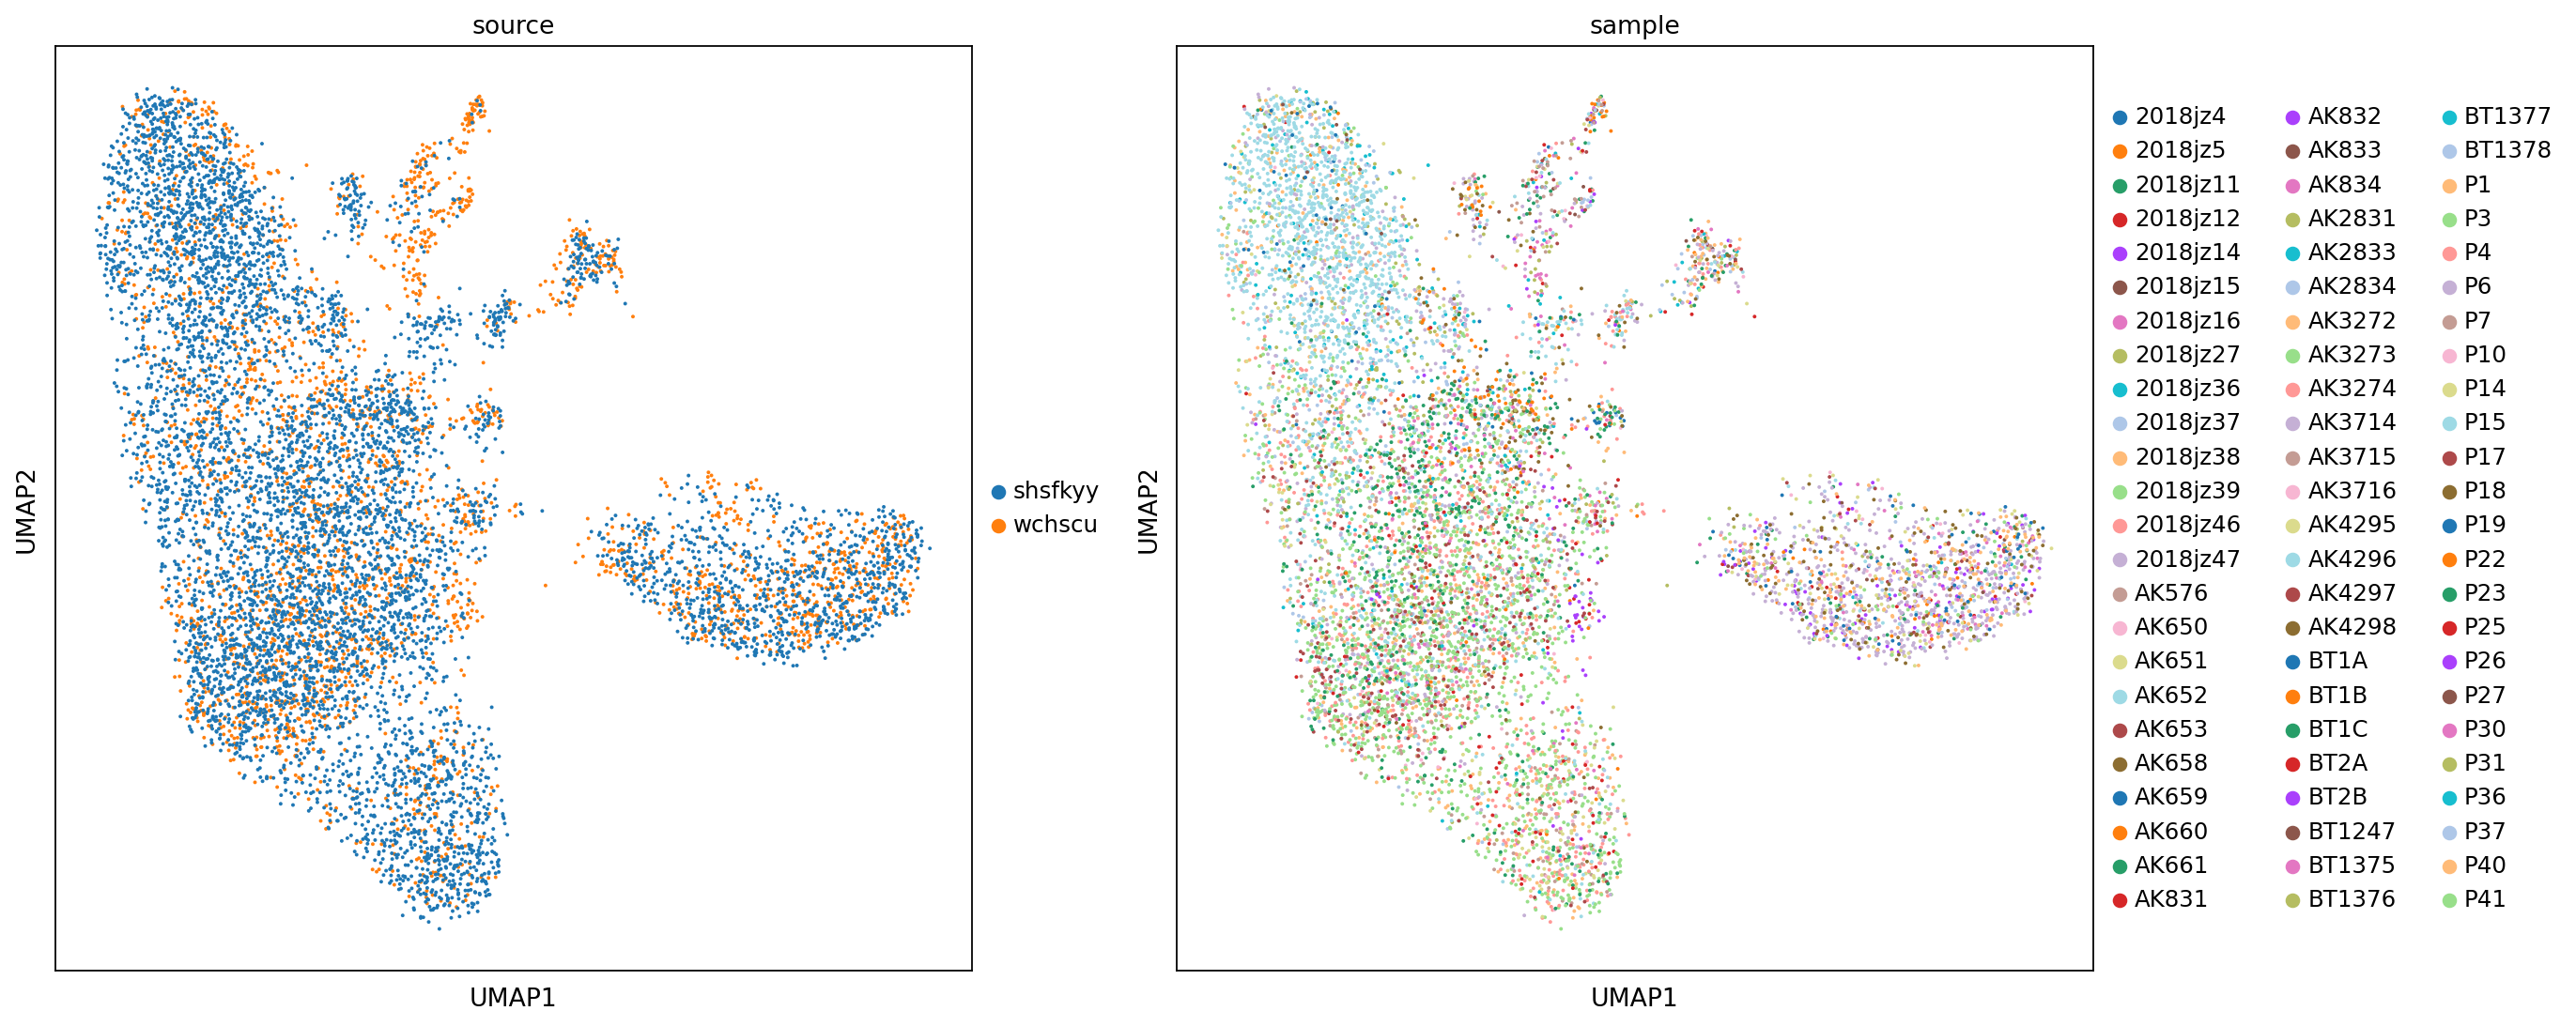

In [14]:
sc.settings.set_figure_params(fontsize=12, figsize=(8,8))
# obtain UMAP plot
sc.tl.umap(em)
sc.pl.umap(em, color=['source','sample'], ncols=2, palette=sc.pl.palettes.vega_20_scanpy)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


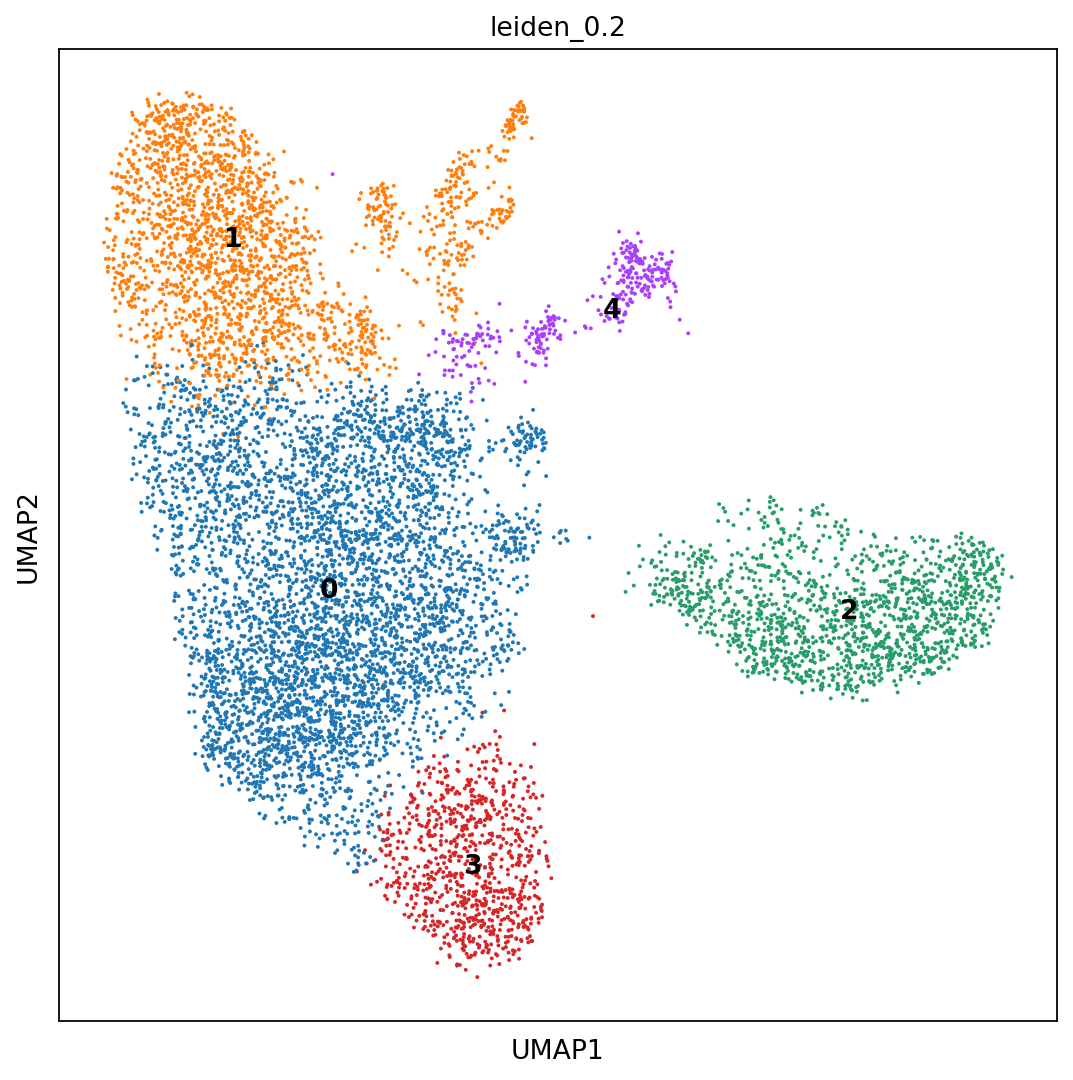

In [18]:
# leiden clustering
sc.tl.leiden(em, resolution=0.2, random_state=0, key_added='leiden_0.2')# check the clusters on the UMAP
sc.pl.umap(em,color=['leiden_0.2'],legend_loc='on data',palette=sc.pl.palettes.vega_20_scanpy)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


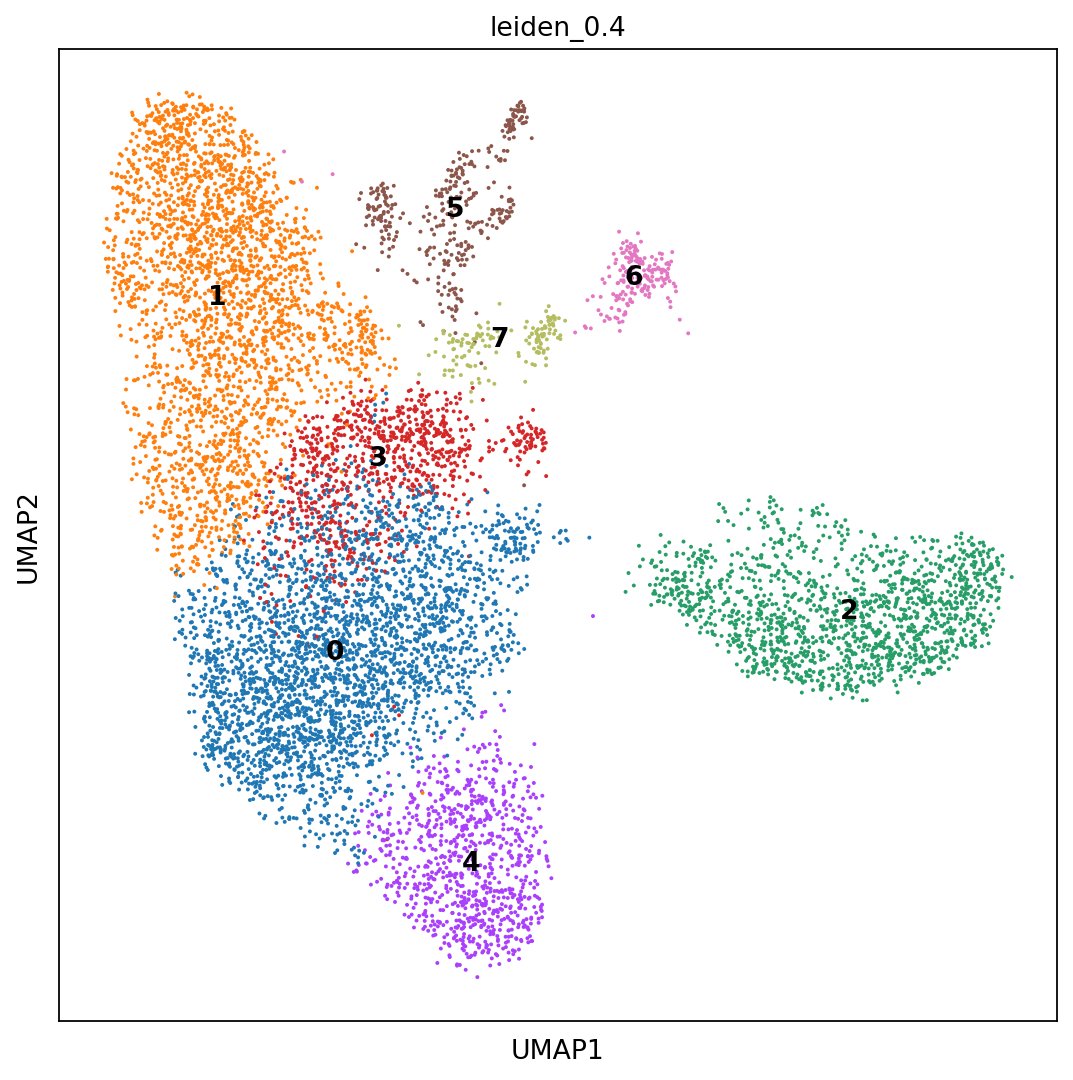

In [17]:
# leiden clustering
sc.tl.leiden(em, resolution=0.4, random_state=0, key_added='leiden_0.4')# check the clusters on the UMAP
sc.pl.umap(em,color=['leiden_0.4'],legend_loc='on data',palette=sc.pl.palettes.vega_20_scanpy)

In [55]:
annDict = {
    '0':'Cluster0',
    '1':'Cluster1',
    '2':'Cluster2',
    '3':'Cluster3',
    '4':'Cluster4',
    '5':'Cluster5',
    '6':'Cluster6',
    '7':'Cluster7',
}
em.obs['subtype'] = [annDict[i] for i in em.obs['leiden_0.4']]

In [56]:
em.write('K135_lusc_Malignant.h5ad')

In [57]:
em.obs.to_csv('K135_lusc_Malignant_obs.csv', index=True, header=True)

# proportion analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
ctList = list(set(em.obs['subtype']))
spList = sorted(list(set(em.obs['stage_sample'])))

In [59]:
sizes = em.obs.groupby(['subtype', 'stage_sample']).size()
props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index() 
props = props.pivot(columns='stage_sample', index='subtype').T
props.index = props.index.droplevel(0)
print(props.index)
props.fillna(0, inplace=True)
props = props.loc[spList,reversed(ctList)]
props

CategoricalIndex(['III&IV_2018jz16', 'III&IV_2018jz27', 'III&IV_2018jz37',
                  'III&IV_2018jz38', 'III&IV_P1', 'III&IV_P3', 'III&IV_P4',
                  'III&IV_P6', 'III&IV_P7', 'III&IV_P10', 'III&IV_P14',
                  'III&IV_P15', 'III&IV_P17', 'III&IV_P18', 'III&IV_P19',
                  'III&IV_P22', 'III&IV_P23', 'III&IV_P25', 'III&IV_P26',
                  'III&IV_P27', 'III&IV_P30', 'III&IV_P31', 'III&IV_P36',
                  'III&IV_P37', 'III&IV_P40', 'III&IV_P41', 'II_2018jz4',
                  'II_AK576', 'II_AK2831', 'II_AK2833', 'II_AK2834',
                  'II_AK3272', 'II_AK3273', 'II_AK3274', 'II_AK4295',
                  'II_AK4296', 'II_AK4297', 'II_AK4298', 'II_BT1A', 'II_BT1B',
                  'II_BT1C', 'I_2018jz11', 'I_2018jz12', 'I_2018jz46',
                  'I_AK658', 'I_AK659', 'I_AK660', 'I_AK661', 'I_BT2A',
                  'I_BT2B', 'I_BT1375', 'I_BT1376', 'I_BT1377', 'Norm_2018jz5',
                  'Norm_2018jz14', 'Norm

/tmp/ipykernel_423507/3572616348.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index()


subtype           Cluster3  Cluster7   Cluster1   Cluster0   Cluster2  \
stage_sample                                                            
III&IV_2018jz16   0.000000   0.00000   0.000000   0.000000  25.000000   
III&IV_2018jz27   0.000000   0.00000   0.000000   0.000000  50.000000   
III&IV_2018jz37  15.957447   2.12766  32.978723  36.170213   1.063830   
III&IV_2018jz38  60.975610   0.00000   9.756098  12.195122   0.000000   
III&IV_P1         4.000000   3.20000  39.466667  30.666667   1.600000   
...                    ...       ...        ...        ...        ...   
Norm_AK832        0.000000   0.00000   0.000000   0.000000  92.857143   
Norm_AK833        0.000000   0.00000   0.000000   0.000000  86.666667   
Norm_AK834        0.000000   0.00000   0.000000   0.000000  81.250000   
Norm_BT1247       0.000000   0.00000   0.000000   0.000000  20.000000   
Norm_BT1378       0.000000   0.00000   0.000000   0.000000  80.000000   

subtype           Cluster5   Cluster4   Cluster6  
stage_sample                                      
III&IV_2018jz16  25.000000   0.000000  50.000000  
III&IV_2018jz27   0.000000   0.000000  50.000000  
III&IV_2018jz37   2.127660   4.255319   5.319149  
III&IV_2018jz38   4.878049   2.439024   9.756098  
III&IV_P1         0.533333  14.666667   5.866667  
...                    ...        ...        ...  
Norm_AK832        7.142857   0.000000   0.000000  
Norm_AK833        0.000000   0.000000  13.333333  
Norm_AK834        0.000000   0.000000  18.750000  
Norm_BT1247      80.000000   0.000000   0.000000  
Norm_BT1378      18.333333   0.000000   1.666667  

[72 rows x 8 columns]

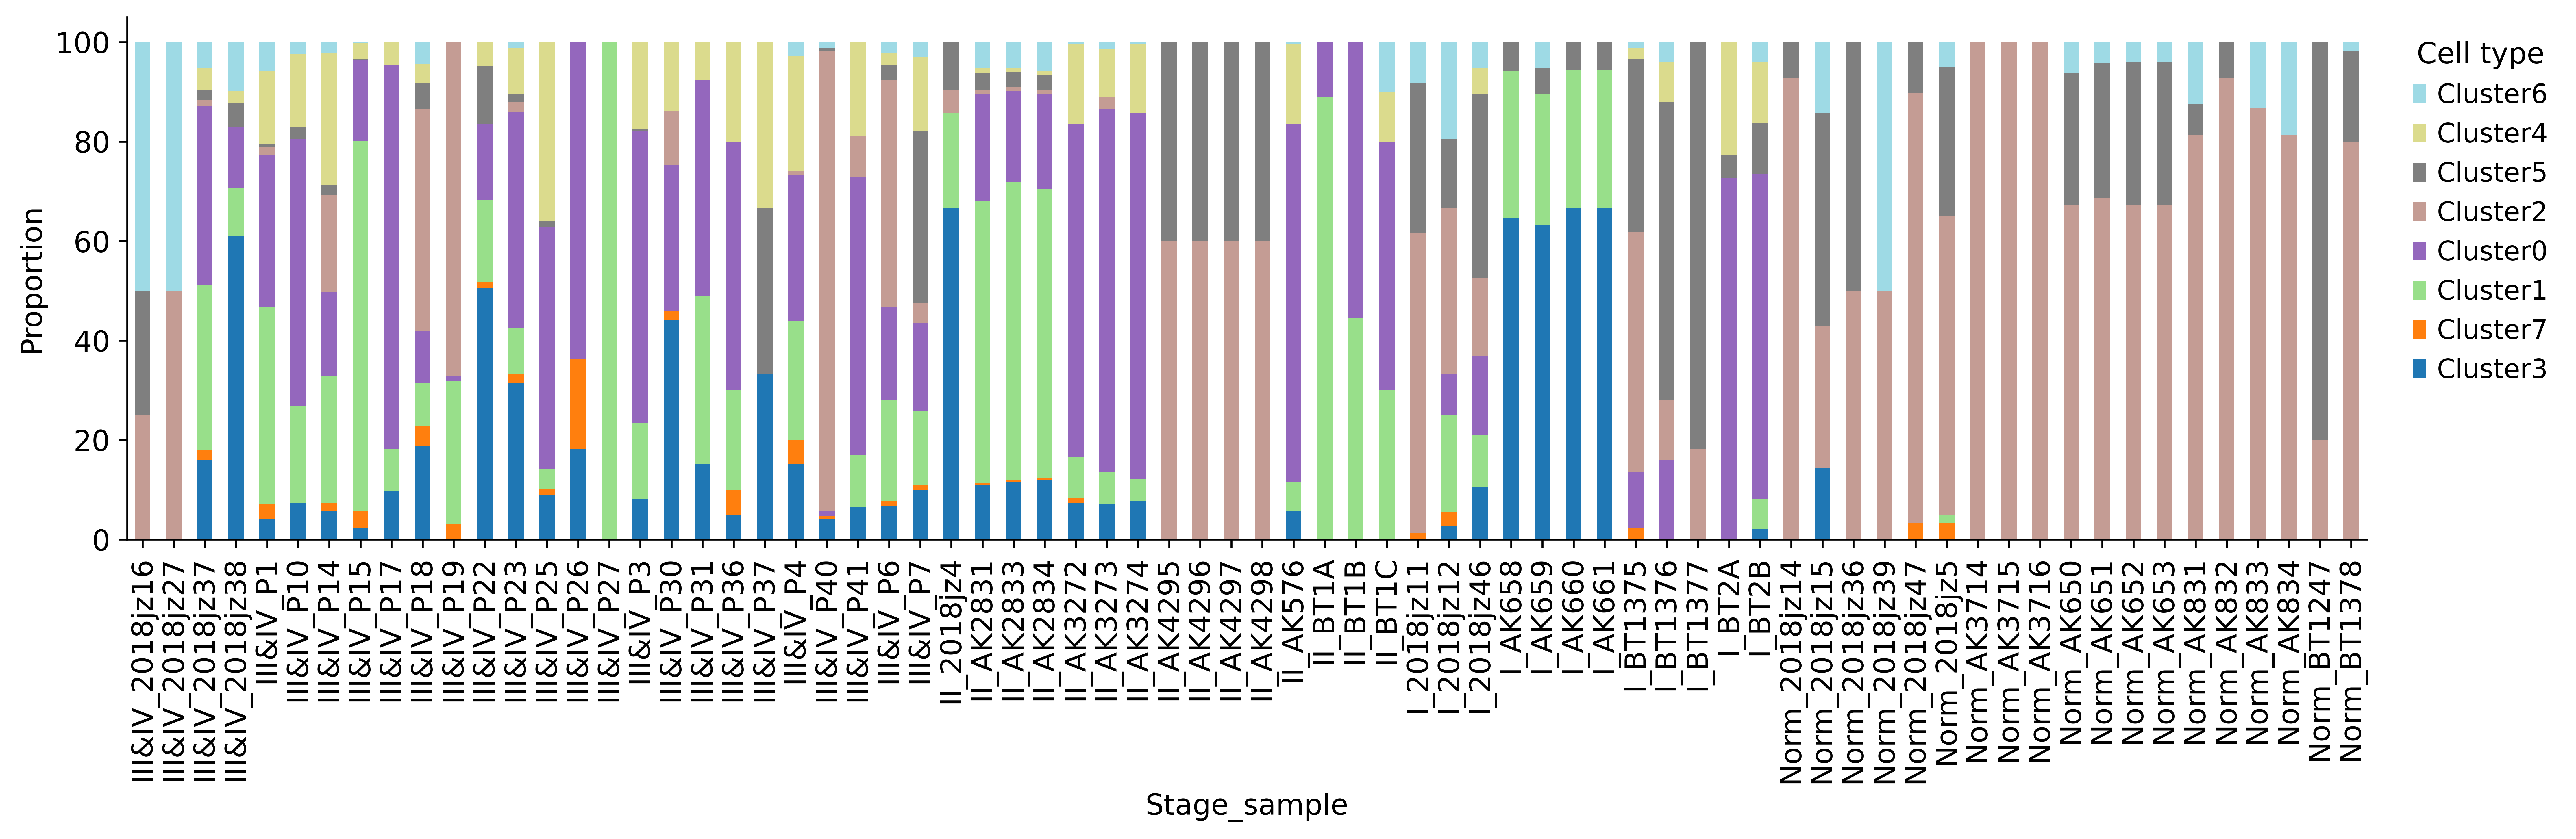

In [60]:
#0.4分
fig, ax = plt.subplots(dpi=300, figsize=(15, 5))
props.plot(kind="bar", stacked=True, ax=ax, legend=None, colormap='tab20')
# Matplotlib idiom to reverse legend entries 
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.01, 1), frameon=False, title="Cell type")
sns.despine(fig, ax)
ax.tick_params(axis="x", rotation=90)
ax.set_xlabel(props.index.name.capitalize())
ax.set_ylabel("Proportion")
fig.patch.set_facecolor("white")
plt.grid(False)
#sc.settings.set_figure_params(fontsize=10, figsize=(5, 25))
fig.tight_layout()
#fig.savefig('figures/fraction+.pdf')

In [48]:
from scipy.stats import f_oneway

In [49]:
I_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='I'])
II_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='II'])
IIIIV_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='III&IV'])
Norm_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='Norm'])

In [50]:
for ct in ctList:
    print(ct,'-> pvalue:')
    print(f_oneway(props.loc[I_list,ct],
             props.loc[II_list,ct],
             props.loc[IIIIV_list,ct],
             props.loc[Norm_list,ct]).pvalue)

0 -> pvalue:
0.00019928699920616588
3 -> pvalue:
0.007071797146470828
7 -> pvalue:
0.02644198868055111
4 -> pvalue:
0.00027394265527662875
6 -> pvalue:
0.5415230064726614
5 -> pvalue:
0.01024940315551619
1 -> pvalue:
0.0019673828769645493
2 -> pvalue:
2.6583159951745736e-11


/tmp/ipykernel_423507/608974009.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f_oneway(props.loc[I_list,ct],
/tmp/ipykernel_423507/608974009.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  props.loc[II_list,ct],
/tmp/ipykernel_423507/608974009.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  props.loc[IIIIV_list,ct],
/tmp/ipykernel_423507/608974009.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  props.loc[Norm_list,ct]).pvalue)
/tmp/ipykernel_423507/608974009.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f_oneway(props.loc[I_list,ct],
/tmp/ipykernel_423507/608974009.py:4: FutureWarning: Passing a set as an indexe

In [61]:
props['stage'] = [i.split('_')[0] for i in props.index]
props

subtype           Cluster3  Cluster7   Cluster1   Cluster0   Cluster2  \
stage_sample                                                            
III&IV_2018jz16   0.000000   0.00000   0.000000   0.000000  25.000000   
III&IV_2018jz27   0.000000   0.00000   0.000000   0.000000  50.000000   
III&IV_2018jz37  15.957447   2.12766  32.978723  36.170213   1.063830   
III&IV_2018jz38  60.975610   0.00000   9.756098  12.195122   0.000000   
III&IV_P1         4.000000   3.20000  39.466667  30.666667   1.600000   
...                    ...       ...        ...        ...        ...   
Norm_AK832        0.000000   0.00000   0.000000   0.000000  92.857143   
Norm_AK833        0.000000   0.00000   0.000000   0.000000  86.666667   
Norm_AK834        0.000000   0.00000   0.000000   0.000000  81.250000   
Norm_BT1247       0.000000   0.00000   0.000000   0.000000  20.000000   
Norm_BT1378       0.000000   0.00000   0.000000   0.000000  80.000000   

subtype           Cluster5   Cluster4   Cluster6   stage  
stage_sample                                              
III&IV_2018jz16  25.000000   0.000000  50.000000  III&IV  
III&IV_2018jz27   0.000000   0.000000  50.000000  III&IV  
III&IV_2018jz37   2.127660   4.255319   5.319149  III&IV  
III&IV_2018jz38   4.878049   2.439024   9.756098  III&IV  
III&IV_P1         0.533333  14.666667   5.866667  III&IV  
...                    ...        ...        ...     ...  
Norm_AK832        7.142857   0.000000   0.000000    Norm  
Norm_AK833        0.000000   0.000000  13.333333    Norm  
Norm_AK834        0.000000   0.000000  18.750000    Norm  
Norm_BT1247      80.000000   0.000000   0.000000    Norm  
Norm_BT1378      18.333333   0.000000   1.666667    Norm  

[72 rows x 9 columns]

In [62]:
props.to_csv('proportion/K135_proportion_Malignant.csv', index=True, header=True)#violin plot by R

# ~

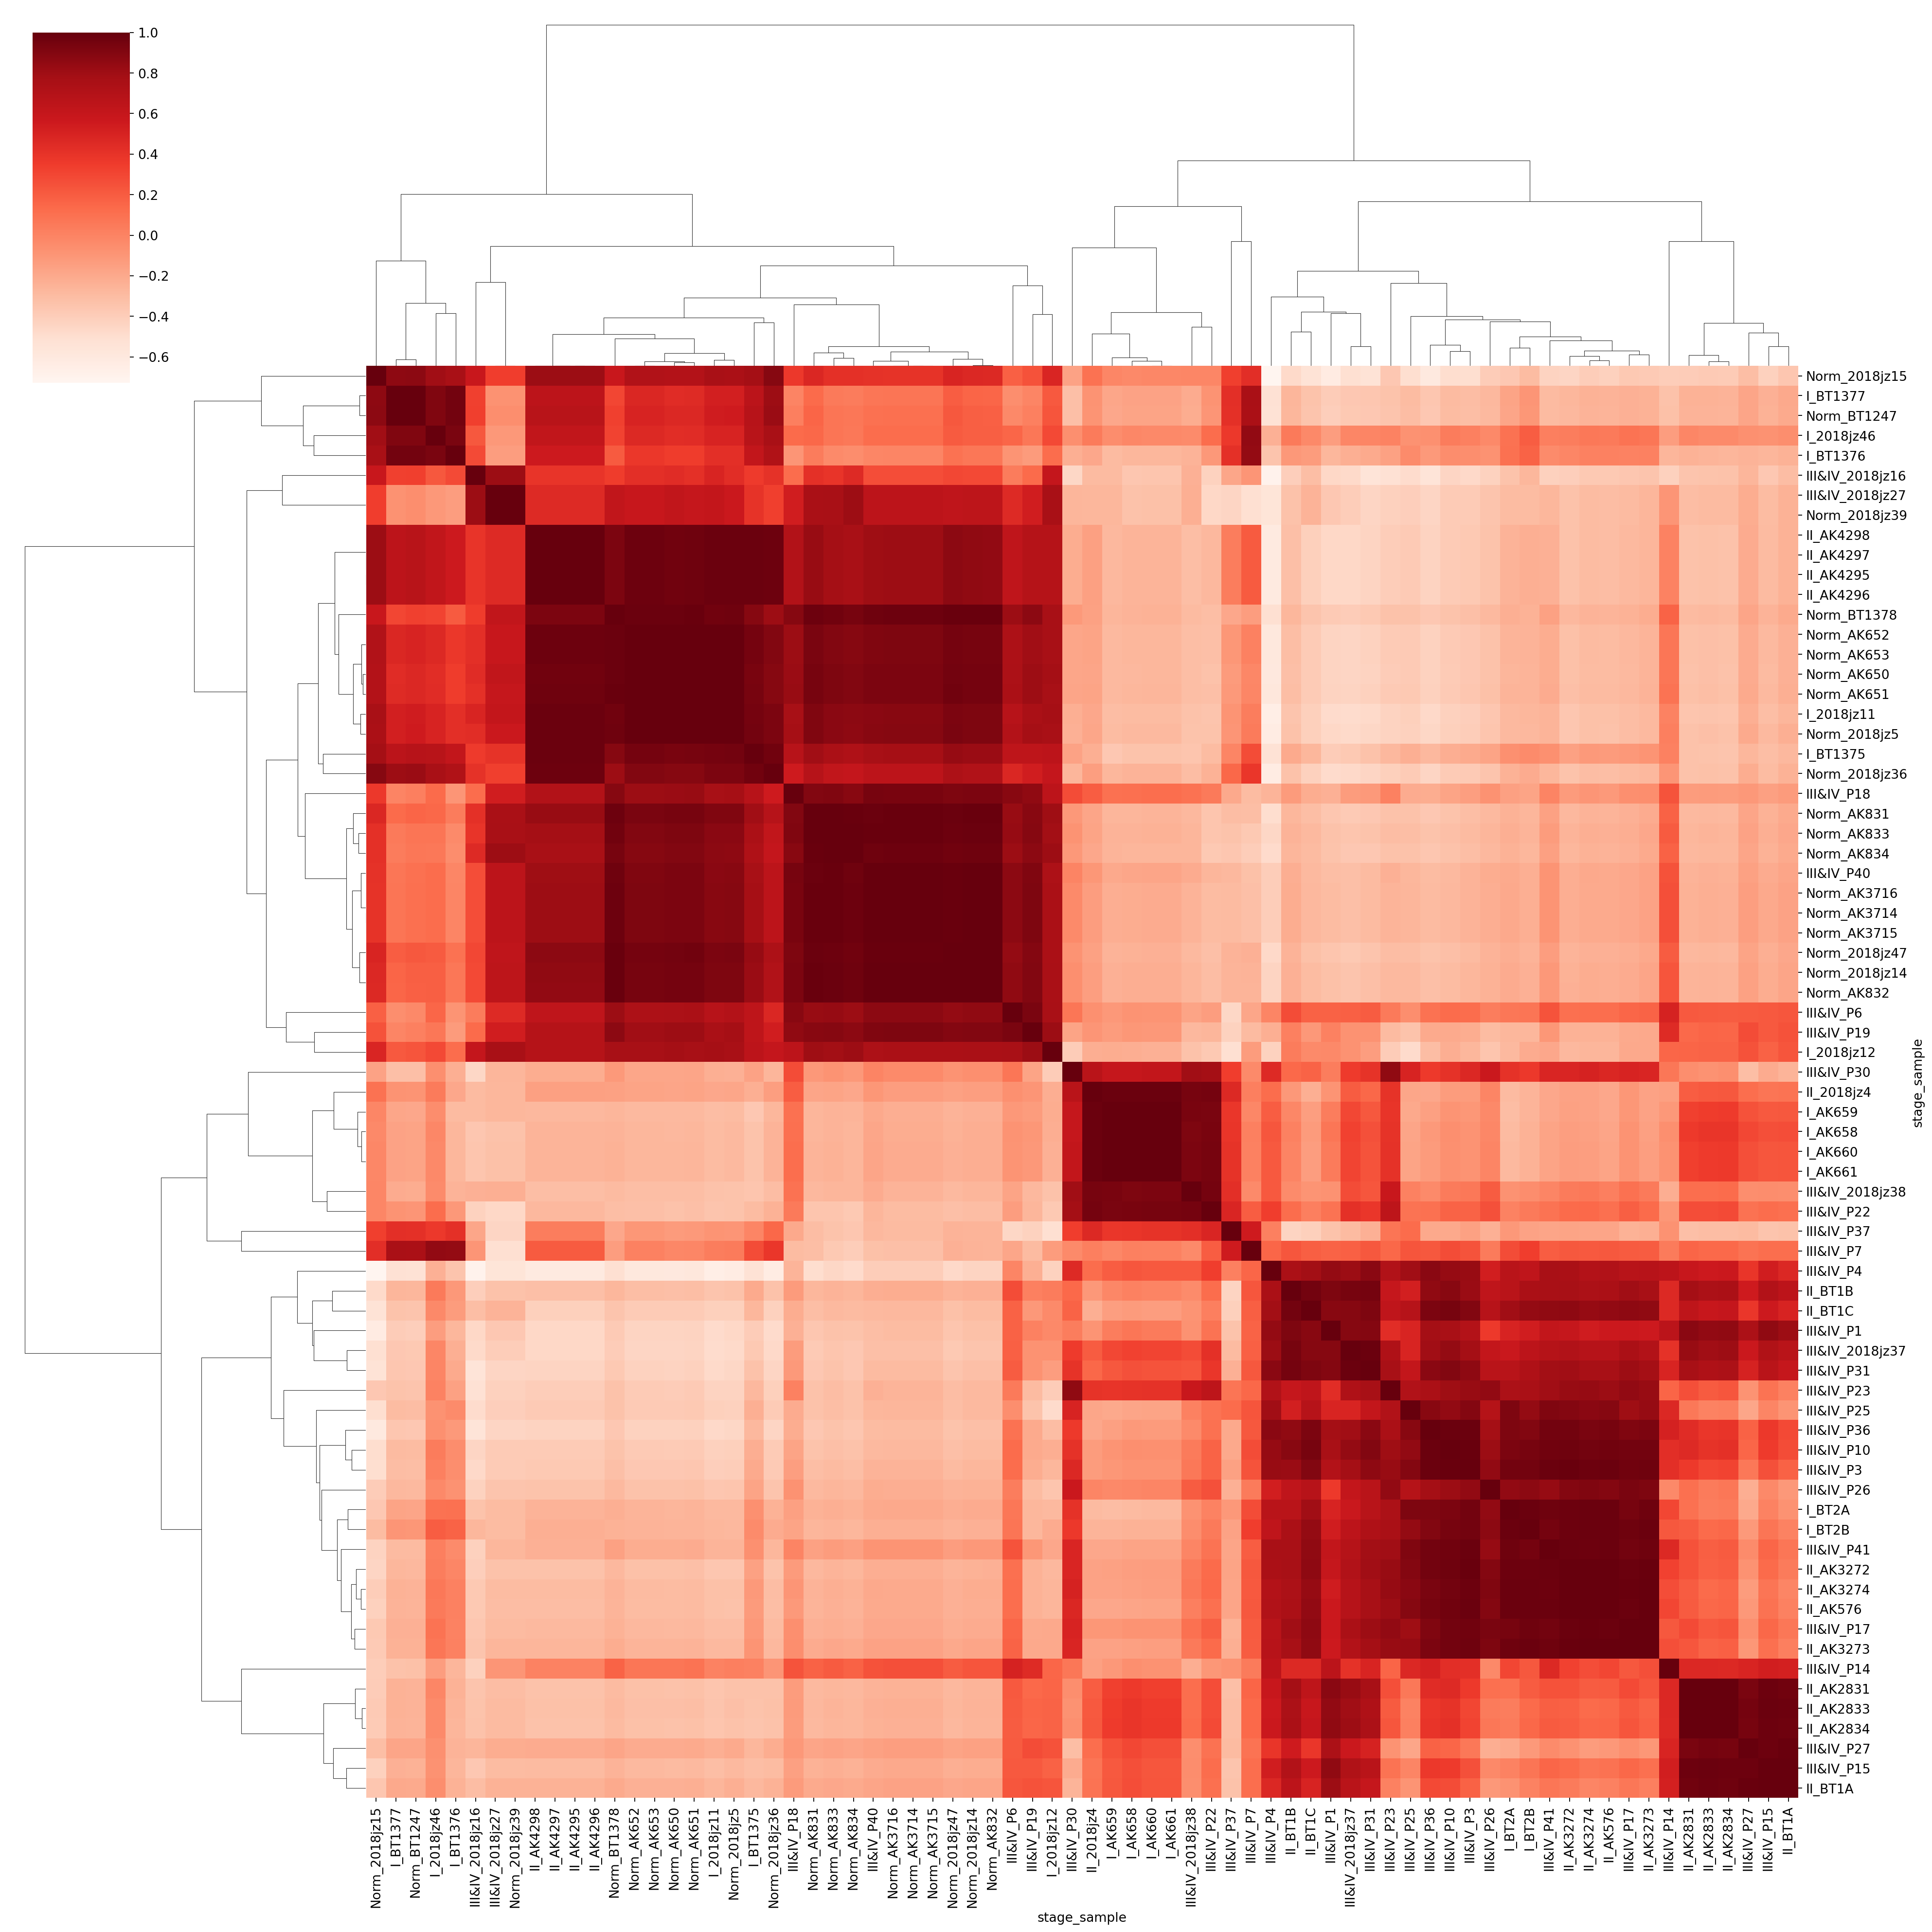

In [76]:
# plotting correlation heatmap
dataplot=sns.clustermap(props.loc[:,props.columns[:-1]].T.corr(), figsize=(25, 25),cmap='Reds')